<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 24, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [56]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot


In [57]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [9]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [13]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [14]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"El cojunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El cojunto de datos de prueba tiene {test.shape[0]} registros")

El cojunto de datos de entrenamiento tiene 800 registros
El cojunto de datos de prueba tiene 200 registros


Punto 2: Hacer pre-procesamiento del texto

In [17]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [19]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

Punto 3: Entrenar el modelo

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [21]:
# Inicializamos los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight="balanced")
svm = LinearSVC(class_weight='balanced')

In [22]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

Punto 4: Métricas de evaluación, Exactitud, precisión y sensibilidad

In [24]:
# Hacemos las predicciones para los datos de prueba (test)
logreg.predict(X_test)

array(['video_games', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'jewelry',
       'video_games', 'video_games', 'jewelry', 'jewelry', 'video_games',
       'video_games', 'jewelry', 'jewelry', 'video_games', 'jewelry',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'video_games',
       'jewelry', 'jewelry', 'jewelry', 'video_games', 'video_games',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'video_games',
       'jewelry', 'jewelry', 'jewelry', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'video_games', 'video_games', 'video_games', 'jewelry',
       'video_games', 'video_games', 'video_games', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'video_games', 'video_games',
       'video_games', 'video_games', 'video_games', 'video_games',
       'video_games', 'video_games', 'video_games', 'jewelry',
       'video_games', 'video_games', 'jewelry', 'video_games',
       'vi

In [27]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

Exactitud

In [28]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.86
Regresión Logística:    0.86
SVM:                    0.84


Otras métricas

In [31]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.81
Regresión Logística:    0.86
SVM:                    0.82

recall_score
Naive Bayes:            0.95
Regresión Logística:    0.86
SVM:                    0.86

f1_score
Naive Bayes:            0.87
Regresión Logística:    0.86
SVM:                    0.84



Matriz de confusión

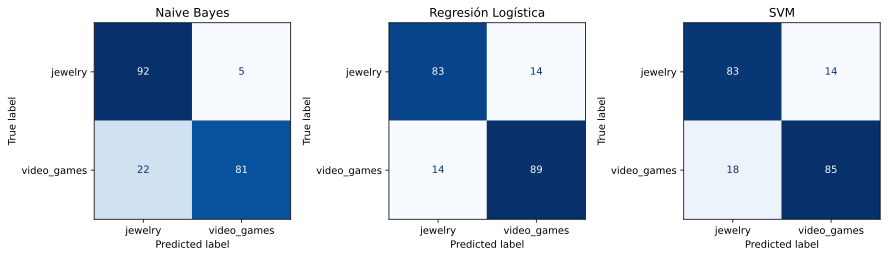

In [32]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");

Términos más importantes de cada categoría

In [33]:
# Resultados
nuevo = ['Hola, estás?', 'ENTRADAS GRATIS']
nuevo_trans = tfidf_vect.transform(nuevo)
logreg.predict(nuevo_trans)
# nb.predict_proba(nuevo_trans)

array(['video_games', 'video_games'], dtype=object)

In [35]:
# Explicación
vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}

In [39]:
[(vocab[e[0]],round(e[1],2)) for e in zip(nb.feature_log_prob_[0, :].argsort(),sorted(logreg.coef_[0]))][-10:]

[('bonita', 0.99),
 ('plata', 1.01),
 ('pulsera', 1.13),
 ('regalo', 1.18),
 ('bonitos', 1.2),
 ('foto', 1.26),
 ('precio', 1.36),
 ('bonito', 1.36),
 ('bien', 1.94),
 ('calidad', 3.61)]

# Parte 2: Agrupación

Punto 1: Hacer pre-procesamiento del texto

In [46]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

Punto 2: Método del codo para determinar $K$

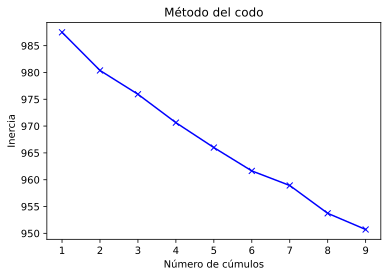

In [50]:
ks = []
kinertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.xlabel("Número de cúmulos"); 
plt.ylabel("Inercia");
plt.title('Método del codo')
plt.plot(ks,kinertia, 'bx-');

Punto 3: Entrenar modelo con el $K$ escogido

In [87]:
k_pt = 4
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"{color.BOLD}CLUSTERS:\n{color.END}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"{color.BLUE}Cluster {i}:{color.END}")
    print(f"{color.CYAN}COUNT {color.END} {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"{color.CYAN}TERMS {color.END}", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{color.BOLD}{terms[ind]}{color.END}', end=" "),
    print(f"\n{color.CYAN}REPRESENTATIVE COMMENTS{color.END}")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_body'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  655 comments (65.50% of the data)
TERMS  juego producto si llegado regalo buen día mas mando solo caja jugar foto gustado llego esperaba tiempo bonita pulsera llegó 
REPRESENTATIVE COMMENTS
* El juego en sí es increíble. A estas alturas de la generación poco más se puede decir salvo que es el simulador de conducción por excelencia, el mejor en su género en consolas. El pero viene por el envío de Amazon. El juego me lo envían sin precinto original, abierto, probablemente procedente de alguna devolución, cosa que no especifican en ningún momento. Además y para colmo, la caja vino con una de las pestañas rotas. Impresionante el mal gusto por parte de Amazon al enviar el producto de esta manera: Gracias a dios el disco está impoluto y el precio aún así mereció la pena, pero me tocará comprar algún juego de segunda mano barato para cambiar la caja.
* El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta

In [88]:
clusters = {0:'a',
            1:'b',
            2:'c',
            3:'d'}

data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
331,es_0936323,product_es_0069431,reviewer_es_0164171,5,Buenisimo! están disfrutando a tope montando l...,Genial!,es,video_games,a
132,es_0302856,product_es_0907235,reviewer_es_0714115,5,"Se lo regalamos a mi sobrina de 12 años, muy f...",Para un regalo,es,jewelry,a


In [89]:
df_centroides = pd.DataFrame(model.cluster_centers_)
df_centroides['cluster'] = clusters.values()
df_centroides

,0,1,2,3,4,5,6,7,8,9,...,3657,3658,3659,3660,3661,3662,3663,3664,3665,cluster
0,4.884466e-04,5.953044e-04,4.552054e-04,2.164089e-04,-3.794708e-19,1.001219e-03,1.026349e-03,2.660556e-04,5.282781e-04,9.109659e-04,...,2.168404e-18,2.164089e-04,2.514076e-04,-5.963112e-19,4.760103e-04,4.765898e-04,4.134603e-04,0.002357,1.673875e-03,a
1,1.368728e-03,4.336809e-19,1.084202e-19,8.131516e-20,0.000000e+00,1.637883e-03,0.000000e+00,-2.710505e-20,5.421011e-20,3.252607e-19,...,7.600338e-03,8.131516e-20,0.000000e+00,-1.626303e-19,5.421011e-20,3.094904e-03,1.084202e-19,0.004057,3.079473e-03,b
2,2.566087e-03,-8.673617e-19,5.421011e-20,-5.421011e-20,2.348100e-03,-4.336809e-19,-8.673617e-19,-8.131516e-20,0.000000e+00,4.336809e-19,...,4.336809e-19,-5.421011e-20,1.355253e-19,1.854761e-03,1.626303e-19,2.577754e-03,-2.710505e-19,0.000580,-4.336809e-19,c
3,-3.252607e-19,1.717583e-02,5.421011e-20,2.710505e-20,0.000000e+00,1.084202e-19,1.084202e-19,0.000000e+00,5.421011e-20,1.084202e-19,...,1.084202e-19,2.710505e-20,-2.710505e-20,-1.084202e-19,0.000000e+00,-2.168404e-19,1.084202e-19,0.002810,0.000000e+00,d


Visualización usando PCA

In [100]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'a': 'blue', 
             'b': 'yellow',
             'c': 'green',
             'd': 'red'}

cols = data['cluster'].map(colorsIdx)

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=cols)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)